<a href="https://colab.research.google.com/github/mohammedmoin44/Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Projects/Online Retail Customer Segmentation  Capstone Project - Mohammed Moin/Online Retail.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.shape

(541909, 8)

#Data Cleaning

In [ ]:
df.duplicated().sum()

5268

In [ ]:
df = df[~df.duplicated()]
df.shape

(536641, 8)

In [ ]:
df[df['Quantity']<0].describe()

,Quantity,UnitPrice,CustomerID
count,10587.000000,10587.000000,8872.000000
mean,-45.576367,42.441206,14990.152953
std,1094.050015,624.566082,1708.230387
min,-80995.000000,0.000000,12346.000000
25%,-10.000000,1.060000,13505.000000
50%,-2.000000,2.100000,14868.000000
75%,-1.000000,4.950000,16393.000000
max,-1.000000,38970.000000,18282.000000


In [ ]:
df = df[~df['Quantity']<0]
df.shape

(526054, 8)

In [ ]:
df['Country'].value_counts()

United Kingdom          481143
Germany                   9027
France                    8393
EIRE                      7883
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1959
Portugal                  1492
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Unspecified                442
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     292
Hong Kong                  280
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon 

In [ ]:
df['Country'] = df['Country'].apply(lambda x:'United Kingdom' if x=='United Kingdom' else 'Other Countries')
df.Country.value_counts(normalize=True)

<ipython-input-11-dcf879f8b51c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = df['Country'].apply(lambda x:'United Kingdom' if x=='United Kingdom' else 'Other Countries')


United Kingdom     0.914627
Other Countries    0.085373
Name: Country, dtype: float64

In [ ]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133322
Country             0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(392732, 8)

In [ ]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

#EDA

In [ ]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [ ]:
df['Amount'] = df['Quantity']*df['UnitPrice']
df['year'] = df['InvoiceDate'].dt.year
df['month'] = df['InvoiceDate'].dt.month
df['day'] = df['InvoiceDate'].dt.day
df['hour'] = df['InvoiceDate'].dt.hour
df['day_of_week'] = df['InvoiceDate'].dt.dayofweek

Text(0.5, 1.0, 'Country count plot')

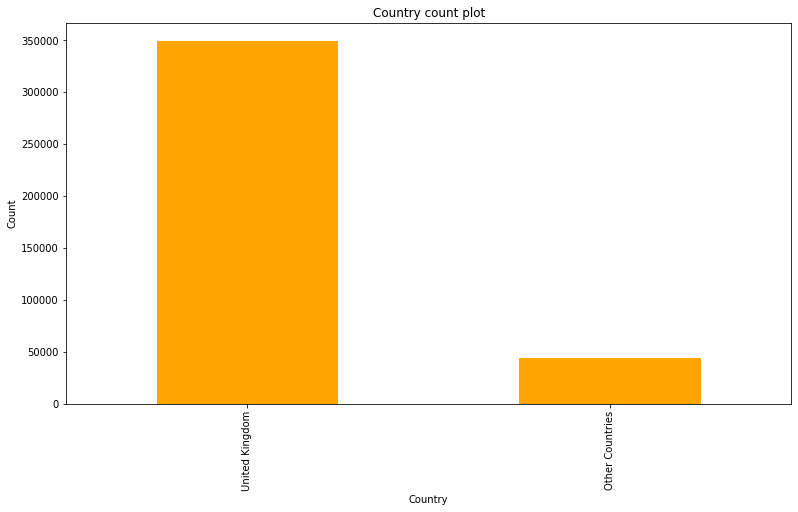

In [ ]:
    plt.figure(figsize=(13,7))
    df['Country'].value_counts().plot.bar(color='orange')
    plt.xlabel('Country')
    plt.ylabel('Count')
    plt.title('Country count plot')

In [ ]:
pd.DataFrame(df['Country'].value_counts())

,Country
United Kingdom,349227
Other Countries,43505


|Country|Count|
|---|---|
|United Kingdom|349227|
|Other Countries|43505|

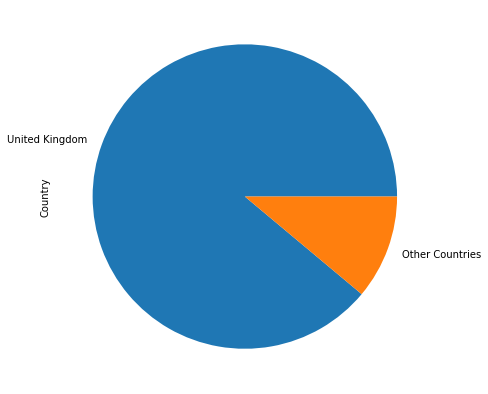

In [ ]:
    plt.figure(figsize=(13,7))
    df['Country'].value_counts().plot.pie()
    

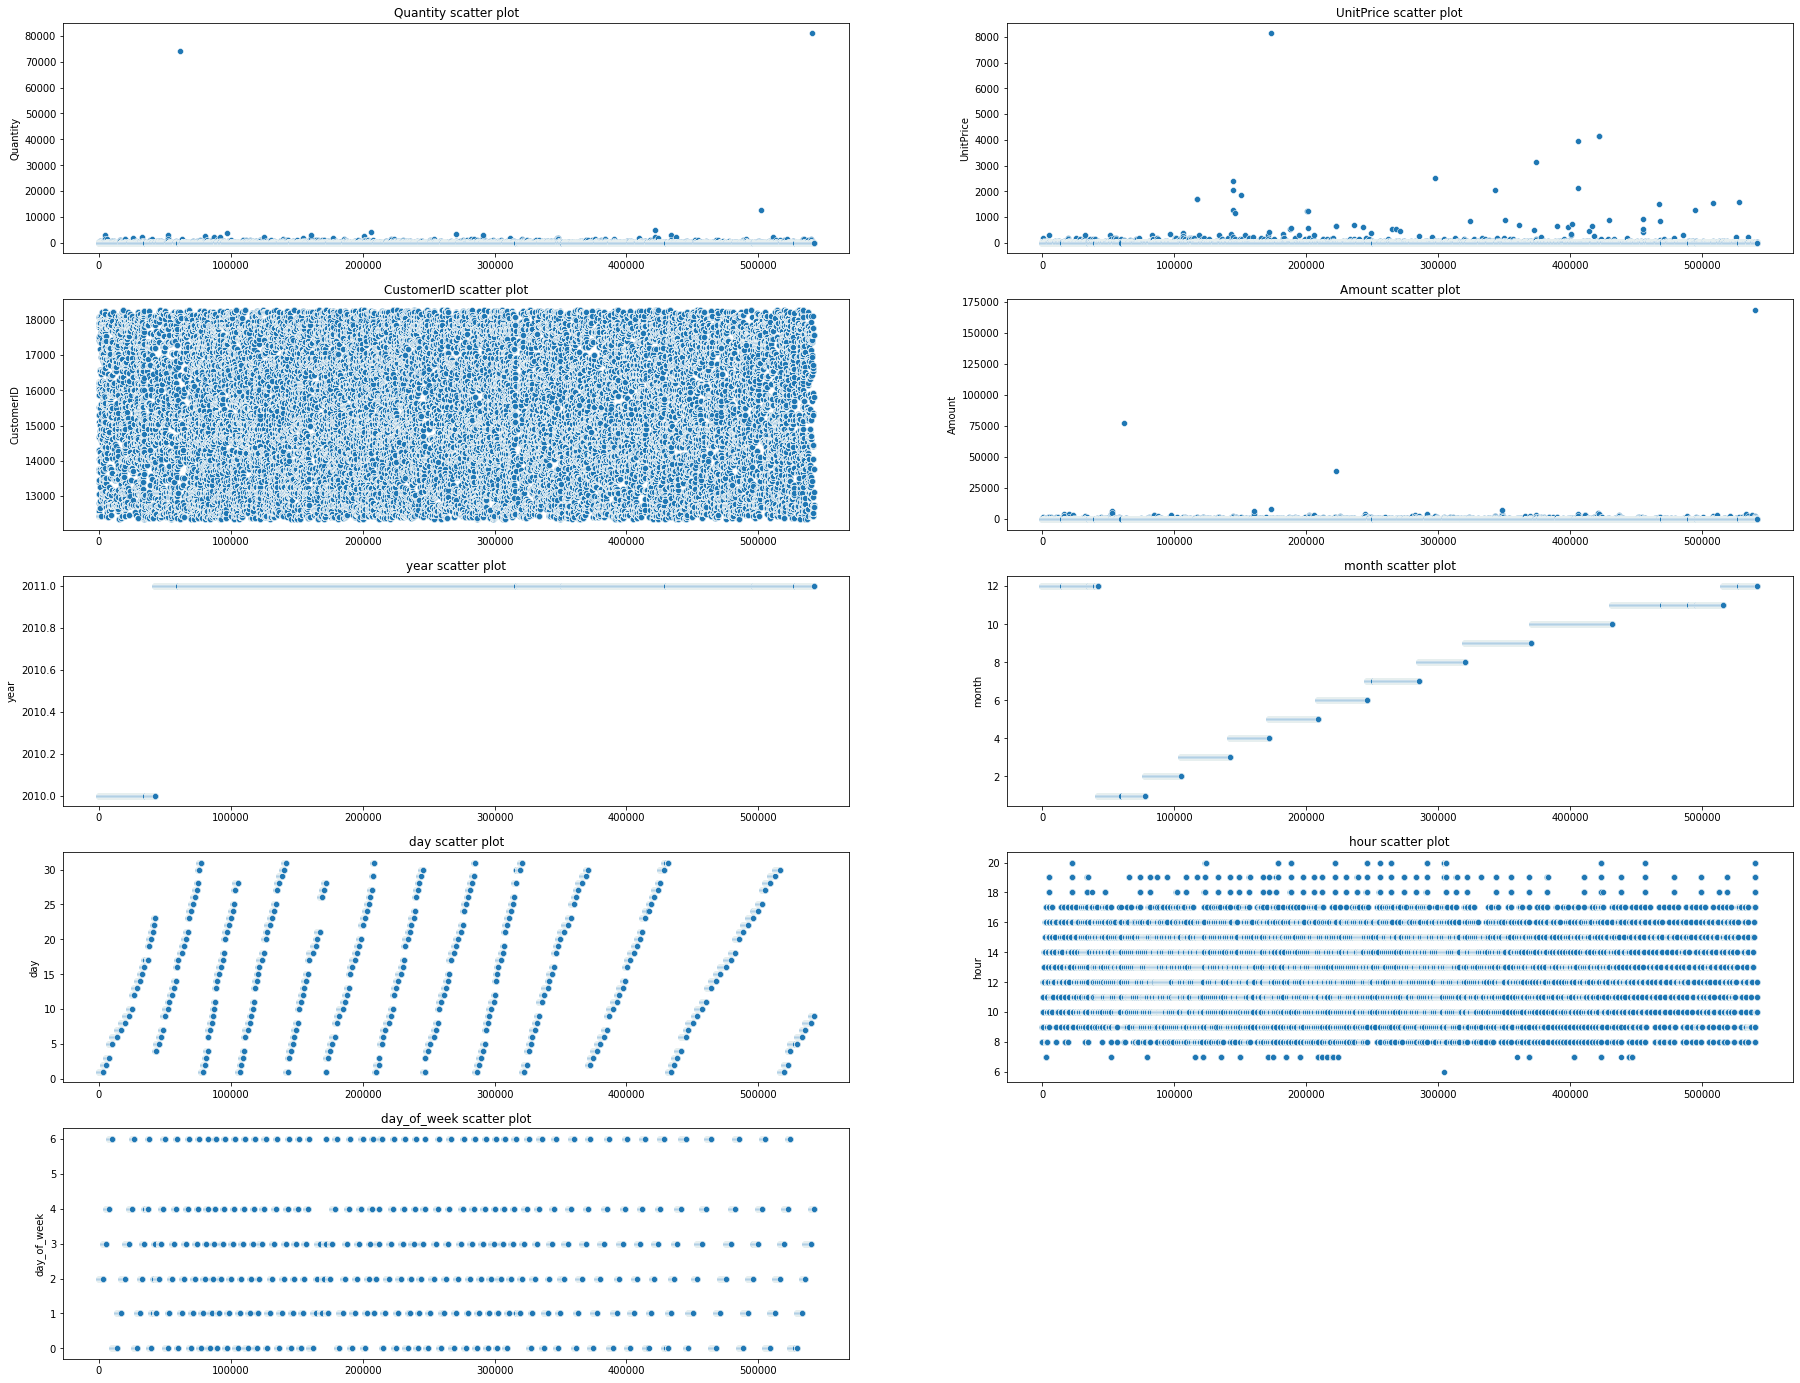

In [ ]:
plt.figure(figsize=(31,50))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    ax = plt.subplot(10,2, i+1)
    sns.scatterplot(data=df[col])
    plt.title(f'{col} ''scatter plot')

In [ ]:
pd.DataFrame(df['StockCode'].value_counts().head(10))

,StockCode
85123A,2023
22423,1714
85099B,1615
84879,1395
47566,1390
20725,1304
22720,1152
POST,1099
23203,1091
20727,1078


|StockCode|Count|
|---|---|
|85123A|2023|
|22423|1714|
|85099B|1615|
|84879|1395|
|47566|1390|
|20725|1304|
|22720|1152|
|POST|1099|
|23203|1091|
|20727|1078|

Text(0.5, 1.0, 'Top ten Products with Stock Code')

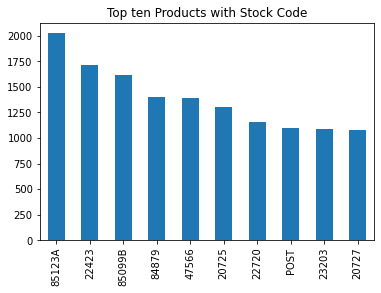

In [ ]:
df['StockCode'].value_counts().head(10).plot(kind='bar')
plt.title('Top ten Products with Stock Code')

In [ ]:
pd.DataFrame(df['Description'].value_counts().head(10))

,Description
WHITE HANGING HEART T-LIGHT HOLDER,2016
REGENCY CAKESTAND 3 TIER,1714
JUMBO BAG RED RETROSPOT,1615
ASSORTED COLOUR BIRD ORNAMENT,1395
PARTY BUNTING,1390
LUNCH BAG RED RETROSPOT,1303
SET OF 3 CAKE TINS PANTRY DESIGN,1152
POSTAGE,1099
LUNCH BAG BLACK SKULL.,1078
PACK OF 72 RETROSPOT CAKE CASES,1050


|Description|Count|
|---|---|
|WHITE HANGING HEART T-LIGHT HOLDER|2016|
|REGENCY CAKESTAND 3 TIER|1714|
|JUMBO BAG RED RETROSPOT|1615|
|ASSORTED COLOUR BIRD ORNAMENT|1395|
|PARTY BUNTING|1390|
|LUNCH BAG RED RETROSPOT|1303|
|SET OF 3 CAKE TINS PANTRY DESIGN |1152|
|POSTAGE|1099|
|LUNCH BAG  BLACK SKULL\.|1078|
|PACK OF 72 RETROSPOT CAKE CASES|1050|

Text(0.5, 1.0, 'Top ten Products Description')

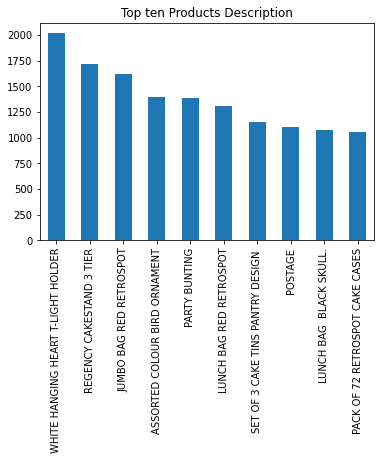

In [ ]:
df['Description'].value_counts().head(10).plot(kind='bar')
plt.title('Top ten Products Description')

In [ ]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Amount                float64
year                    int64
month                   int64
day                     int64
hour                    int64
day_of_week             int64
dtype: object

In [ ]:
pd.DataFrame(df['year'].value_counts())

,year
2011,367059
2010,25673


|year|Count|
|---|---|
|2011|367059|
|2010|25673|

Text(0.5, 1.0, 'Yearly Data Distribution')

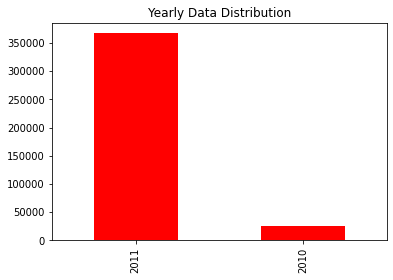

In [ ]:
df['year'].value_counts().plot(kind='bar',color = 'red')
plt.title('Yearly Data Distribution')

In [ ]:
pd.DataFrame(df['CustomerID'].value_counts().head(10))

,CustomerID
17841.0,7676
14911.0,5672
14096.0,5111
12748.0,4413
14606.0,2677
15311.0,2366
14646.0,2080
13089.0,1814
13263.0,1667
14298.0,1637


|CustomerID|Count|
|---|---|
|17841\.0|7676|
|14911\.0|5672|
|14096\.0|5111|
|12748\.0|4413|
|14606\.0|2677|
|15311\.0|2366|
|14646\.0|2080|
|13089\.0|1814|
|13263\.0|1667|
|14298\.0|1637|

Text(0.5, 1.0, 'Top 10 Customers By frequency')

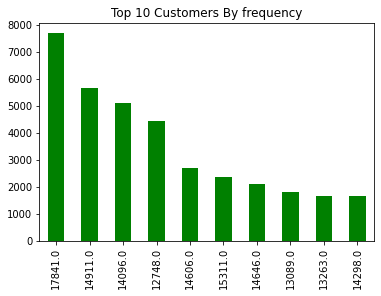

In [ ]:
df['CustomerID'].value_counts().head(10).plot(kind='bar',color = 'green')
plt.title('Top 10 Customers By frequency')

In [ ]:
%matplotlib inline

In [ ]:
pd.DataFrame(df.groupby('Country')['Amount'].sum())

,Amount
Country,
Other Countries,1602184.250
United Kingdom,7285024.644


|Country|Amount|
|---|---|
|Other Countries|1602184\.25|
|United Kingdom|7285024\.644|

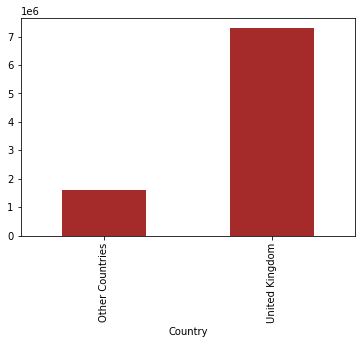

In [ ]:
df.groupby('Country')['Amount'].sum().plot(kind='bar',color='brown')

In [ ]:
pd.DataFrame(df.groupby('StockCode')['Amount'].sum().head(10))

,Amount
StockCode,
10002,699.55
10080,114.41
10120,40.32
10123C,3.25
10124A,6.72
10124G,7.14
10125,929.45
10133,1138.99
10135,1784.19


|StockCode|Amount|
|---|---|
|10002|699\.55|
|10080|114\.41|
|10120|40\.32|
|10123C|3\.25|
|10124A|6\.72|
|10124G|7\.14|
|10125|929\.45|
|10133|1138\.99|
|10135|1784\.19|
|11001|1953\.0|

Text(0.5, 1.0, 'Top ten frequent products with Amount')

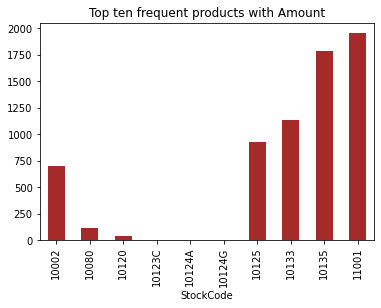

In [ ]:
df.groupby('StockCode')['Amount'].sum().head(10).plot(kind='bar',color='brown')
plt.title('Top ten frequent products with Amount')

In [ ]:
pd.DataFrame(df.groupby('CustomerID')['Amount'].sum().head(10))

,Amount
CustomerID,
12346.0,77183.60
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
12352.0,2506.04
12353.0,89.00
12354.0,1079.40
12355.0,459.40


Text(0.5, 1.0, 'Top ten Customer with Amount')

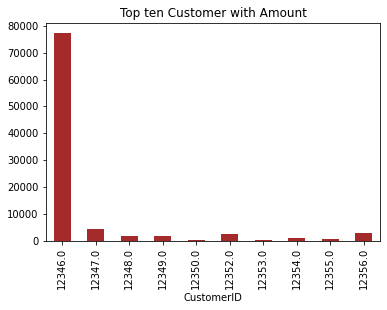

In [ ]:
df.groupby('CustomerID')['Amount'].sum().head(10).plot(kind='bar',color='brown')
plt.title('Top ten Customer with Amount')

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,year,month,day,hour,day_of_week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,2010,12,1,8,2
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,2010,12,1,8,2
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010,12,1,8,2
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010,12,1,8,2
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2010,12,1,8,2


In [ ]:
df1 = df.iloc[:,:9]
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,Other Countries,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,Other Countries,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,Other Countries,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,Other Countries,16.60


#RFM Analysis

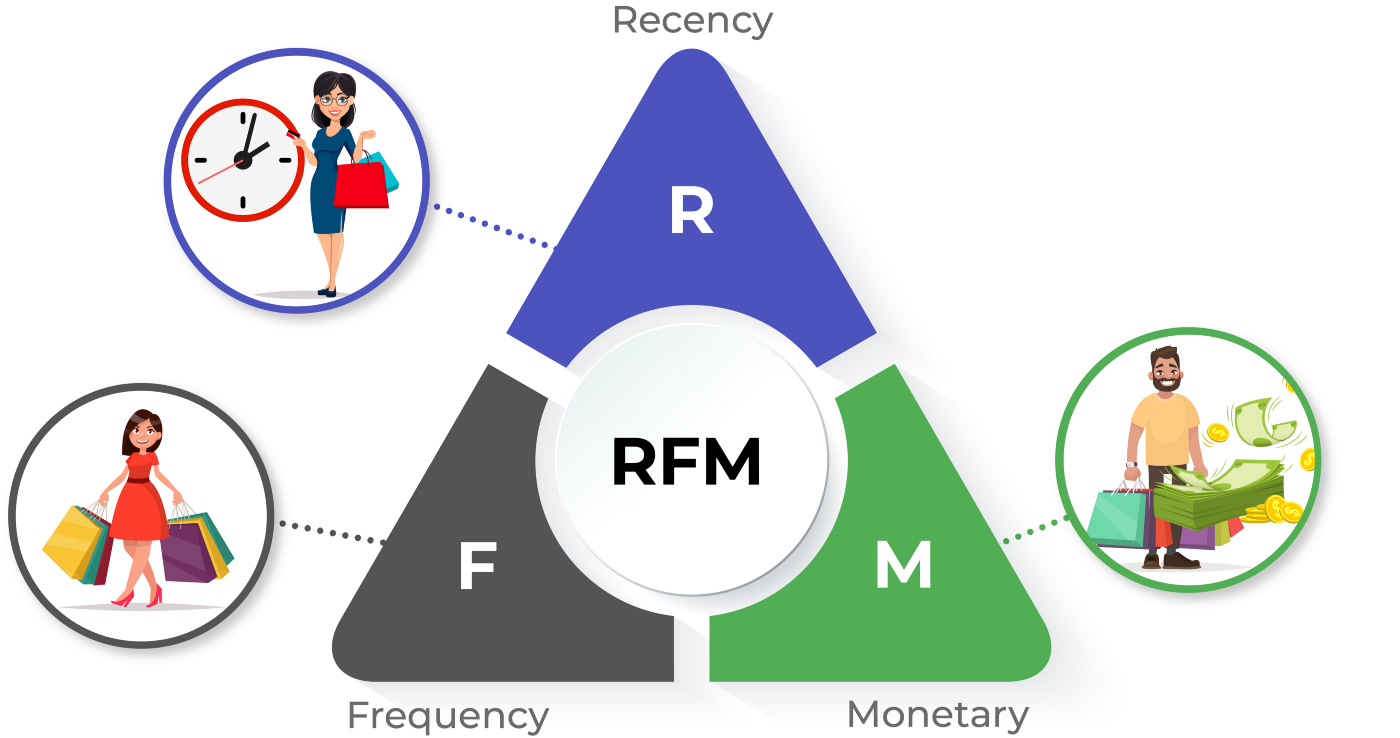

Recency, frequency, monetary value (RFM) is a model used in marketing analysis that segments a company's consumer base by their purchasing patterns or habits. In particular, it evaluates customers' recency (how long ago they made a purchase), frequency (how often they make purchases), and monetary value (how much money they spend).

RFM is then used to identify a company's or an organization's best customers by measuring and analyzing spending habits in order to improve low-scoring customers and maintain high-scoring ones

In [ ]:
# copying the data in other df
df_rfm = df.copy()
# keeping only desired columns
df_rfm = df_rfm.iloc[:,:9]
df_rfm.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
recency = pd.DataFrame(df_rfm.groupby('CustomerID')['InvoiceDate'].max().reset_index())
recency['InvoiceDate'] = pd.to_datetime(recency['InvoiceDate']).dt.date
recency['MaxDate'] = recency['InvoiceDate'].max()
recency['recency'] = (recency['MaxDate'] - recency['InvoiceDate']).dt.days + 1
recency = recency[['CustomerID','recency']]
recency.head()

,CustomerID,recency
0,12346.0,326
1,12347.0,3
2,12348.0,76
3,12349.0,19
4,12350.0,311


In [ ]:
# extracting the FREQUENCY

frequency = pd.DataFrame(df_rfm.groupby('CustomerID')['InvoiceNo'].nunique().reset_index())
frequency.columns = ['fCustomerID','frequency']
frequency.head()

,fCustomerID,frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [ ]:
# extracting the MONETARY

monetary = pd.DataFrame(df_rfm.groupby('CustomerID')['Amount'].sum().reset_index())
monetary.columns = ['mCustomerID','monetary']
monetary.head()

,mCustomerID,monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [ ]:
# combining the three into one table

rfm = pd.concat([recency,frequency,monetary], axis=1)
rfm.drop(['fCustomerID','mCustomerID'], axis=1, inplace=True)
rfm.head(10)

,CustomerID,recency,frequency,monetary
0,12346.0,326,1,77183.60
1,12347.0,3,7,4310.00
2,12348.0,76,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,311,1,334.40
5,12352.0,37,8,2506.04
6,12353.0,205,1,89.00
7,12354.0,233,1,1079.40
8,12355.0,215,1,459.40
9,12356.0,23,3,2811.43


In [ ]:
# assigning the numbers to RFM values. The better the RFM value higher the number
# note that this process is reverse for R score as lower the value the better it i
rfm['recency_score'] = pd.cut(rfm['recency'], bins=[0,18,51,143,264,375], labels=[5,4,3,2,1])
rfm['recency_score'] = rfm['recency_score'].astype('int')
rfm['frequency_score'] = pd.cut(rfm['frequency'], bins=[0,1,2,5,9,210], labels=[1,2,3,4,5])
rfm['frequency_score'] = rfm['frequency_score'].astype('int')
rfm['monetary_score'] = pd.cut(rfm['monetary'], bins=[-1,306,667,1650,3614,290000], labels=[1,2,3,4,5])
rfm['monetary_score'] = rfm['monetary_score'].astype('int')

In [ ]:
# summing the R,F,M score to make a one single column that has value range from 3-15

def score_rfm(x) : return (x['recency_score']) + (x['frequency_score']) + (x['monetary_score'])
rfm['score'] = rfm.apply(score_rfm,axis=1 )
rfm.head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score
0,12346.0,326,1,77183.60,1,1,5,7.0
1,12347.0,3,7,4310.00,5,4,5,14.0
2,12348.0,76,4,1797.24,3,3,4,10.0
3,12349.0,19,1,1757.55,4,1,4,9.0
4,12350.0,311,1,334.40,1,1,2,4.0


In [ ]:
rfm.score.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    4339.000000
mean        8.422909
std         3.310258
min         3.000000
25%         6.000000
50%         8.000000
75%        11.000000
90%        13.000000
95%        15.000000
99%        15.000000
max        15.000000
Name: score, dtype: float64

In [ ]:
# assigning the customers into one of the category Bad, Bronze, Silver, Gold and Platinum based upon the score they get
# we make cuts using percentiles. It can be done in many other ways

rfm['customer_type'] = pd.cut(rfm['score'], bins=[0,6,8,11,13,16], labels=['Bad','Bronze','Silver','Gold','Platinum'])
rfm.head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score,customer_type
0,12346.0,326,1,77183.60,1,1,5,7.0,Bronze
1,12347.0,3,7,4310.00,5,4,5,14.0,Platinum
2,12348.0,76,4,1797.24,3,3,4,10.0,Silver
3,12349.0,19,1,1757.55,4,1,4,9.0,Silver
4,12350.0,311,1,334.40,1,1,2,4.0,Bad


In [ ]:
round(rfm.customer_type.value_counts(normalize=True)*100,0)

Bad         33.0
Silver      28.0
Bronze      20.0
Gold        10.0
Platinum     9.0
Name: customer_type, dtype: float64

We see that around 9% of customers are in platinum category and these are the customers who score is best in all the three RFM. Combining with the gold 19% customers are those who are loyal customer with the business.
Silver category are those where the business can target to convert them into gold category by rolling out offers and new strategies for them.
Bad category are those who are less concerned for the business and does not put much efforts to bring them back.

In [ ]:
# looking the RFM value for each of the category
rfm.groupby('customer_type')['recency','frequency','monetary'].mean().round(0)

<ipython-input-56-4f2f0541e140>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rfm.groupby('customer_type')['recency','frequency','monetary'].mean().round(0)


,recency,frequency,monetary
customer_type,,,
Bad,188.0,1.0,294.0
Bronze,79.0,2.0,710.0
Silver,44.0,4.0,1409.0
Gold,20.0,7.0,3297.0
Platinum,10.0,19.0,12109.0


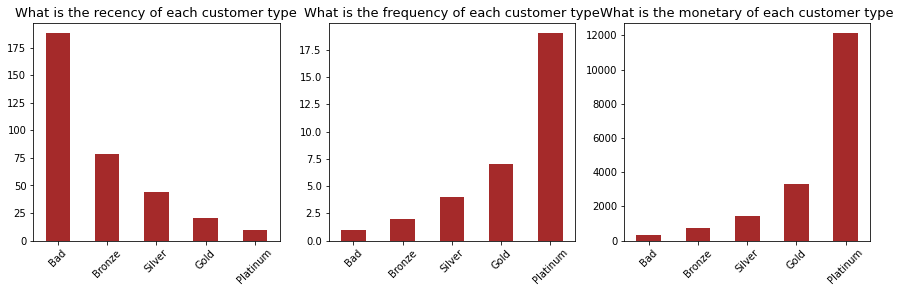

In [ ]:
column = ['recency','frequency','monetary']
plt.figure(figsize=(15,4))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    rfm.groupby('customer_type')[j].mean().round(0).plot(kind='bar', color='brown')
    plt.title('What is the {} of each customer type'.format(j), size=13)
    plt.xlabel('')
    plt.xticks(rotation=45)

plt.show()


#Modeling 

K-means is a centroid-based clustering algorithm, where we calculate the distance between each data point and a centroid to assign it to a cluster. The goal is to identify the K number of groups in the dataset. 
It is an iterative process of assigning each data point to the groups and slowly data points get clustered based on similar features. The objective is to minimize the sum of distances between the data points and the cluster centroid, to identify the correct group each data point should belong to. 

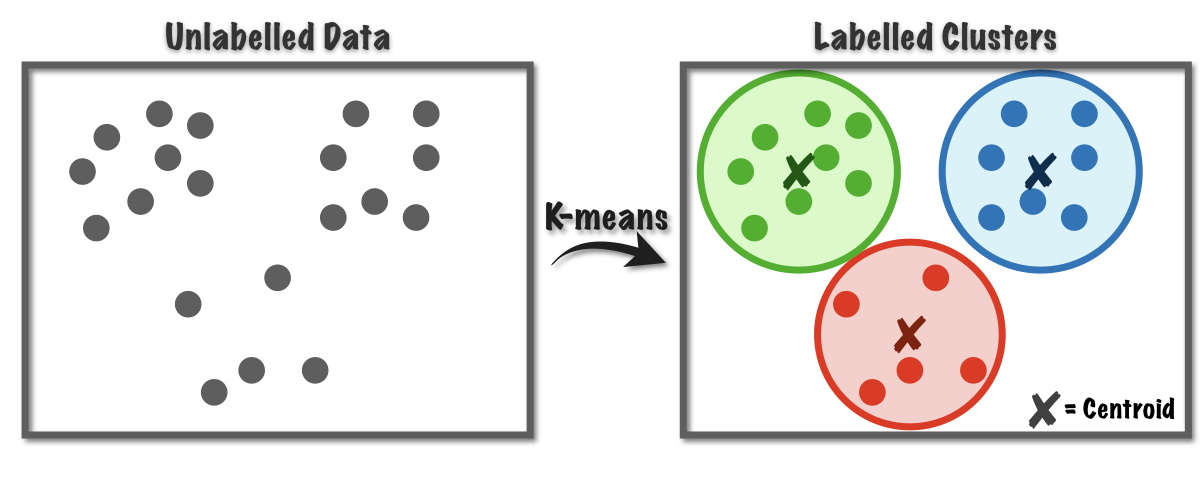

In [ ]:
# copying the data into new variable
df_kmeans = rfm.copy()
# taking only relevant columns
df_kmeans = df_kmeans.iloc[:,:4]
df_kmeans.head()

,CustomerID,recency,frequency,monetary
0,12346.0,326,1,77183.60
1,12347.0,3,7,4310.00
2,12348.0,76,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,311,1,334.40


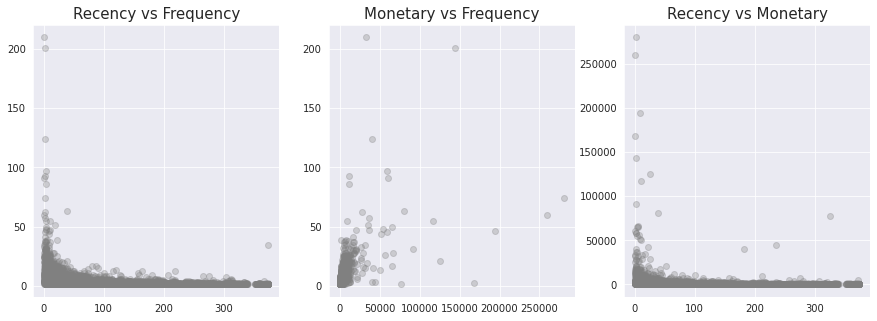

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(df_kmeans.recency, df_kmeans.frequency, color='grey', alpha=0.3)
plt.title('Recency vs Frequency', size=15)
plt.subplot(1,3,2)
plt.scatter(df_kmeans.monetary, df_kmeans.frequency, color='grey', alpha=0.3)
plt.title('Monetary vs Frequency', size=15)
plt.subplot(1,3,3)
plt.scatter(df_kmeans.recency, df_kmeans.monetary, color='grey', alpha=0.3)
plt.title('Recency vs Monetary', size=15)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


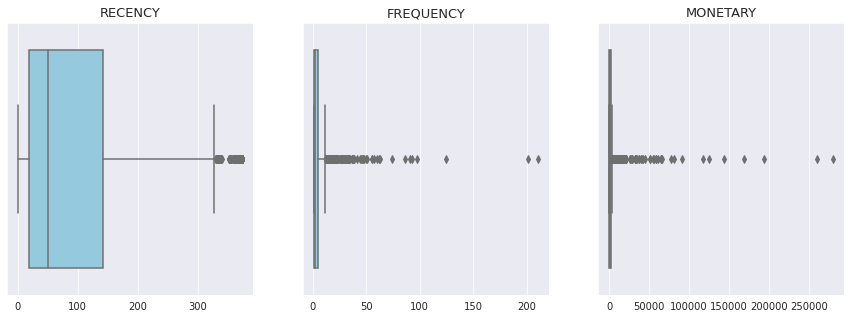

In [ ]:
# variable Distribution
column = ['recency','frequency','monetary']
plt.figure(figsize=(15,5))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    sns.boxplot(df_kmeans[j], color='skyblue')
    plt.xlabel('')
    plt.title('{}'.format(j.upper()), size=13)
plt.show()

In [ ]:
# Removing outliers for Monetary
Q1 = df_kmeans.monetary.quantile(0.05)
Q3 = df_kmeans.monetary.quantile(0.95)
IQR = Q3 - Q1
df_kmeans = df_kmeans[(df_kmeans.monetary >= Q1 - 1.5*IQR) & (df_kmeans.monetary <= Q3 + 1.5*IQR)]

# Removing outliers for Recency
Q1 = df_kmeans.recency.quantile(0.05)
Q3 = df_kmeans.recency.quantile(0.95)
IQR = Q3 - Q1
df_kmeans = df_kmeans[(df_kmeans.recency >= Q1 - 1.5*IQR) & (df_kmeans.recency <= Q3 + 1.5*IQR)]

# Removing outliers for Frequency
Q1 = df_kmeans.frequency.quantile(0.05)
Q3 = df_kmeans.frequency.quantile(0.95)
IQR = Q3 - Q1
df_kmeans = df_kmeans[(df_kmeans.frequency >= Q1 - 1.5*IQR) & (df_kmeans.frequency <= Q3 + 1.5*IQR)]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


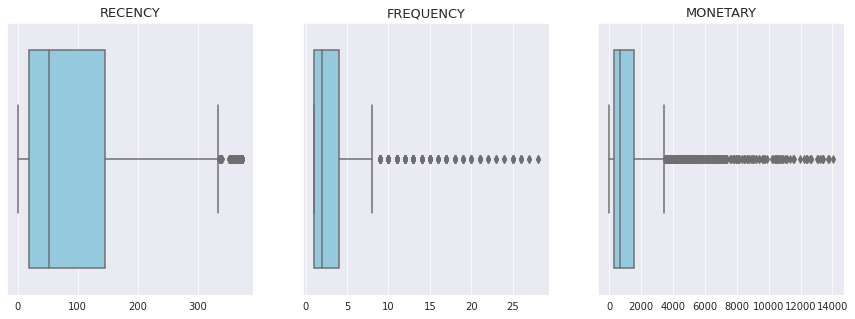

In [ ]:
column = ['recency','frequency','monetary']
plt.figure(figsize=(15,5))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    sns.boxplot(df_kmeans[j], color='skyblue')
    plt.xlabel('')
    plt.title('{}'.format(j.upper()), size=13)
plt.show()

In [ ]:
# resetting the index
df_kmeans = df_kmeans.drop('CustomerID',axis=1)


In [ ]:
df_kmeans

,recency,frequency,monetary
1,3,7,4310.00
2,76,4,1797.24
3,19,1,1757.55
4,311,1,334.40
5,37,8,2506.04
...,...,...,...
4334,278,1,180.60
4335,181,1,80.82
4336,8,2,178.05
4337,4,16,2045.53


In [ ]:
from mpl_toolkits import mplot3d
sns.set_style('darkgrid')

# Silhouette analysis
from sklearn.metrics import silhouette_score

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# for scaling
from sklearn.preprocessing import StandardScaler


In [ ]:


# scaling the variables and store it in different df
standard_scaler = StandardScaler()
df_kmeans_norm = standard_scaler.fit_transform(df_kmeans)

# converting it into dataframe
df_kmeans_norm = pd.DataFrame(df_kmeans_norm)
df_kmeans_norm.columns = ['recency','frequency','monetary']
df_kmeans_norm.head()

,recency,frequency,monetary
0,-0.912604,0.872418,1.666760
1,-0.183209,0.095375,0.268122
2,-0.752737,-0.681668,0.246030
3,2.164845,-0.681668,-0.546115
4,-0.572886,1.131432,0.662650


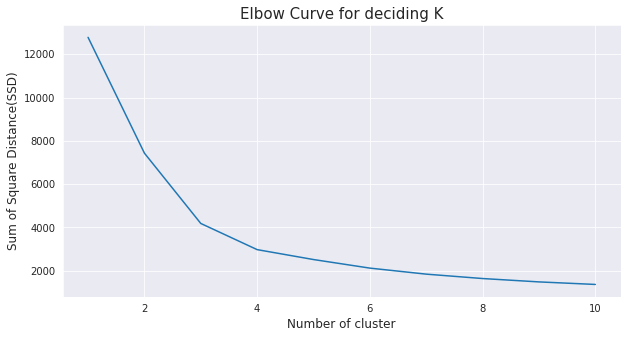

In [ ]:
# Elbow-curve/SSD

ssd = []
for num_clusters in list(range(1,11)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_kmeans_norm)
    ssd.append(model_clus.inertia_)
    
# plot the SSDs for each n_clusters
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,11,1), ssd)
plt.xlabel('Number of cluster', size=12)
plt.ylabel('Sum of Square Distance(SSD)', size=12)
plt.title('Elbow Curve for deciding K', size=15)
plt.show()

In [ ]:
# Silhouette analysis

for num_clusters in list(range(2,11)):
    # intialise kmeans
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_kmeans_norm)
    
    cluster_labels = model_clus.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_kmeans_norm, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5451300976778563
For n_clusters=3, the silhouette score is 0.5109781113281802
For n_clusters=4, the silhouette score is 0.4860174490935858
For n_clusters=5, the silhouette score is 0.44167922585239955
For n_clusters=6, the silhouette score is 0.41729326587649
For n_clusters=7, the silhouette score is 0.4221915581231222
For n_clusters=8, the silhouette score is 0.38382251042329635
For n_clusters=9, the silhouette score is 0.38455051935124734
For n_clusters=10, the silhouette score is 0.3481047396128432


In [ ]:
# Kmeans with K=3
model_clus3 = KMeans(n_clusters = 3)
model_clus3.fit(df_kmeans_norm)

KMeans(n_clusters=3)

In [ ]:
df_kmeans['clusters'] = model_clus3.labels_
df_kmeans.head()

,recency,frequency,monetary,clusters
1,3,7,4310.00,2
2,76,4,1797.24,0
3,19,1,1757.55,0
4,311,1,334.40,1
5,37,8,2506.04,0


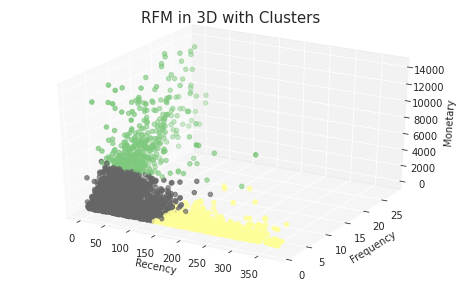

In [ ]:
S# Creating figure
fig = plt.figure(figsize = (8, 5))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(df_kmeans.recency, df_kmeans.frequency, df_kmeans.monetary, c=df_kmeans.clusters, cmap='Accent_r')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('RFM in 3D with Clusters', size=15)
ax.set(facecolor='white')
plt.show()

#Conclusion:
1.Cluster RFM Interpretation Type of Customer
0
Last purchase long ago,
Least number of transactions,
Least monetary spending
Churned 

2.Recent transaction,
Most frequent transactions,
Highest monetary spending
Best (target) 

3.Recent transaction,
Low purchase frequency
Low monetary spending
New 

4.Last purchase while ago,
Less frequent transactions
Low monetary spending
At Risk